# CIS-UNet  
コンテキスト（文脈）を考慮したシフトウィンドウ自己注意機構による、コンピュータ断層血管造影（CTA）における大動脈のマルチクラス・セグメンテーション

### 目的

Multi-Class Segmentation of the Aorta（大動脈のマルチクラス・セグメンテーション）

目的：大動脈の各部位（上行大動脈、大動脈弓、下行大動脈など）や、関連する主要な枝を**色分けして（クラス分けして）**抽出する。

- Computed Tomography Angiography (CTA)  
造影剤を使って血管を強調したCT画像。  
血管の境界がはっきりしやすい反面、非常に細かい枝の構造を正確に捉えられる。  

- Context-Aware（コンテキスト/文脈を考慮した）  
周辺の臓器や血管のつながりといった「広い範囲の情報」を賢く利用するという意味です。これが「CIS」の「C（Context-Infused）」に対応します。  

- Shifted Window Self-Attention（シフトウィンドウ自己注意機構）  
これが Swin Transformer の核となる技術です。画像を窓（ウィンドウ）に区切って計算しつつ、その窓をずらす（シフトする）ことで、窓をまたいだ情報のやり取りを可能にします。

### 概要

大動脈とその分枝（枝分かれした血管）の正確な3Dセグメンテーションは、手術介入において重要。なぜなら、誤った術前計画やステントグラフトの作製につながる可能性があるから。  
- ステントグラフト：大動脈瘤（だいどうみゃくりゅう）などの血管の病気を治療するために使われる医療器具  
「人工血管」と「金網（ステント）」を組み合わせたもの  

大動脈と13の主要な分枝をマルチクラス（多クラス）でセグメンテーションするために設計された深層学習モデル、Context Infused Swin-UNet (CIS-UNet) を提案  
1. CNNエンコーダ
2. CNNデコーダ
3. スキップ接続
4. 「CSW-SA」（Context-aware Shifted Window Self-Attention）をボトルネック・ブロックに配置  

特徴マップを効率的に凝縮して「グローバルな空間的文脈（全体像）」を提供し、ボトルネック層に適用した際に性能を向上



### イントロ

大動脈は体内最大の動脈である。酸素を含んだ血液を端部に運ぶ。ここが病気になったら生命や手足の維持に直結する脅威となり得る。  
医療画像と治療法は進歩しており、分岐血管を伴う修復術では、大動脈と各分岐の解剖学的な構造を詳細に3d分析することが不可欠。適切なデバイスを選択するために、大動脈や個々の分岐の中心線や直径を測定することが含まれる。  
高解像度のコンピュータ断層血管造影（CTA）は、血管病変を評価し、術前の計画を円滑に進めるための標準的な検査法となっています。CTAは広く普及しており、大動脈全体とその分枝を高精度な空間解像度で画像化することができます。  
術前CTAを取得した後、ほとんどの外科医は3D計画のために市販のソフトウェアプラットフォームを利用します。しかし、非常に高価であり、かつ「半自動」であるため、測定値（血管の太さや長さなど）を取得するには、多大な時間と専門的なトレーニングが必要となります。  
これを解決するために完全に自動化された大動脈セグメンテーションは数多く開発されたが、それらは主に主大動脈と分岐をまとめた二値分類セグメンテーションでした。これでは、個々の分岐ごとの中心線や直径の測定値を提供できない。また、血管のねじれや狭窄（きょうさく）を正確に表すことは難しい。  
CIS U-Netは大動脈と13の分枝すべてを対象とした「マルチクラス・セグメンテーション」に特化しており、ほかの既存の手法は存在しない。  


#### ロジカル設計図

CIS-UNetは、CNN（畳み込みニューラルネットワーク）と Swin Transformer の両方の長所を活かし、階層的なU字型のエンコーダ・デコーダ構造を採用。 
Swin Transformer の自己注意（Self-Attention）機構は効率的ですが、ローカルウィンドウ（画像を区切った小さな窓）単位の注意だけでは、グローバルな依存関係（画像全体のつながり）のモデル化に限界がありました。

これを解決するためにContext-aware Shifted Window Self-Attention (CSW-SA) を提案します。これは、特徴マップを空間次元に沿って凝縮し、  
-> 画像全体を位置情報を保つように二次元圧縮。
それを Swin Transformer ブロックからの元の出力と統合する仕組みです。  
-> タイルごとのデータと混ぜる。  
このプロセスにより、自己注意の「窓」を超えて、グローバルな文脈情報を抽出・統合することが可能になります。また、これはボトルネック層にのみ使用する。

- 勾配消失
- 残差接続  
x = layer(x) + x のように、計算結果に元の値を足す。

標準的なCTAは、**「単純（非造影）相」「動脈相」「遅延相」**の3つのフェーズで構成されます。

1. 単純相: ヨード造影剤で隠れてしまう可能性のある血腫や血管壁のプラークを検出するために撮影されます。

2. 動脈相: ヨード造影剤を急速に注入し、大動脈や分枝に造影剤が到達するピークに合わせて撮影することで、動脈血管を最適に可視化します。

3. 遅延相: 流れの遅い血流や静脈構造を評価するために、適切なタイミングを置いて撮影されます。

## cis unetの構造

CNNとswin transformerの能力を統合したモデル。

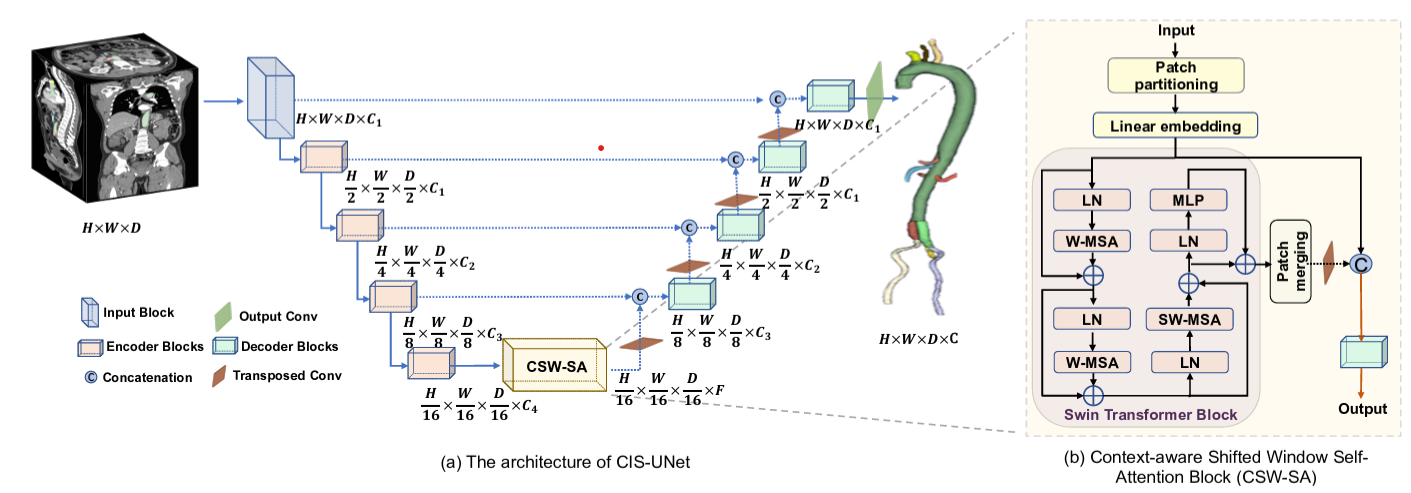

In [2]:
from PIL import Image

Image.open('cu1.png')

### エンコーダ

- input block  
7*7*7というフィルター（重み）を使い、ストライド1（1マスずつ動かす）で適応すると、特徴量C1が抽出される。  
64個のフィルターを用意し、それぞれ別々の特徴マップを抽出する。つまり、特徴マップの数も64個になる。  
入力画像のサイズを $H \times W \times D$ とすると、入力ブロック通過後の特徴マップのサイズは $H \times W \times D \times C_1$ となる。  
端の処理については不明（1辺-7の半分の数のピクセル数となる）（ソースコードみればわかるかも）。パディングか？  

図で書いた方がおおと思う。

- down sampling  
ストライド2の畳み込み層を用いて、データの縦・横・奥行きを半分に圧縮する。  
サイズは分からんかった。



- Feature Extraction Block  
特徴抽出ブロック (Feature Extraction Block):
ここで**残差接続（Residual Connection）**を持つ $3 \times 3 \times 3$ の畳み込みユニットが $L$ 回繰り返されます。？

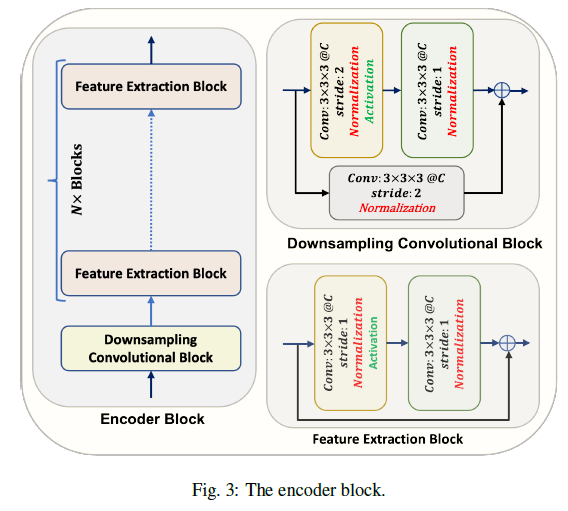

In [3]:
Image.open('cu2.png')

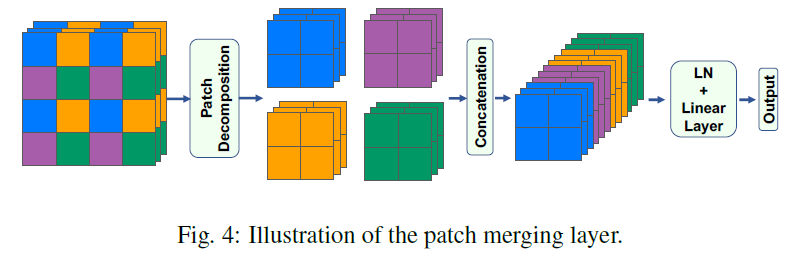

In [4]:
Image.open("cu3.png")